In [4]:
import pandas as pd
import numpy as np
import tqdm
import datetime

In [5]:
isins = pd.read_csv("Q:/MSK1_QR/HistoricalData/market_data_spx/isin.txt", index_col=0)

# MARKET DATA

In [6]:
import glob
path = '../MarketData_raw/NA/'
files = glob.glob(path + '*.csv')
tickers = list(map(lambda f: f[42:-4], files))
print(' '.join(tickers[:10]))

AN8068571086 BMG491BT1088 BMG6359F1032 BMG812761002 BMG982941046 CH0044328745 CH0048265513 CH0102993182 CH0114405324 GB00B4VLR192


In [7]:
market_data = pd.DataFrame()
for filename, sym in zip(files, tickers):
    mdf = pd.read_csv(filename, index_col=['Date'], parse_dates=['Date'], usecols=['Date', 'Close'])
    market_data = pd.concat([market_data, mdf], axis=1) 

In [8]:
market_data.columns = tickers

In [9]:
na_market_data= market_data.apply(lambda series: series.loc[:series.last_valid_index()].ffill())
#na_market_data.ix[1:, :].to_csv('../un_spx_daily_nonadjusted_close.csv')

In [10]:
na_market_data.shape

(2853, 768)

In [15]:
import glob
path = '../MarketData_raw/A/'
files = glob.glob(path + '*.csv')
tickers = list(map(lambda f: f[41:-4], files))

print(' '.join(tickers[:10]))

AN8068571086 BMG491BT1088 BMG6359F1032 BMG812761002 BMG982941046 CH0044328745 CH0048265513 CH0102993182 CH0114405324 GB00B4VLR192


In [16]:
market_data = pd.DataFrame()
for filename, sym in zip(files, tickers):
    mdf = pd.read_csv(filename, index_col=[0], parse_dates=[0], usecols=[0, 4])
    market_data = pd.concat([market_data, mdf], axis=1) 

In [17]:
market_data.columns = tickers
market_data.index.name = 'Date'

In [18]:
market_data = market_data.loc[market_data.index <= na_market_data.index[-1]]

In [19]:
market_data

,AN8068571086,BMG491BT1088,BMG6359F1032,BMG812761002,BMG982941046,CH0044328745,CH0048265513,CH0102993182,CH0114405324,GB00B4VLR192,...,US98389B1008,US9839191015,US9841211033,US98419M1009,US9843321061,US9884981013,US98956P1021,US9897011071,US98978V1035,VGG607541015
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,38.510,8.39213,38.325,30.5946,59.43,34.67,95.8597,NaN,17.8300,38.175,...,6.445,16.70,7.7954,NaN,40.9100,4.3779,64.00,70.6300,NaN,NaN
2006-01-04,39.200,8.63213,38.800,30.9146,60.83,35.60,97.1462,NaN,16.9200,39.225,...,6.535,17.86,7.7823,NaN,40.9700,4.5217,64.65,71.1700,NaN,NaN
2006-01-05,38.930,9.14213,37.725,31.8746,60.70,35.47,95.3452,NaN,16.1150,38.205,...,6.525,19.48,7.6769,NaN,41.5300,5.2444,63.92,71.8700,NaN,NaN
2006-01-06,40.570,9.45213,38.425,31.7146,60.81,36.19,98.4041,NaN,17.5400,39.695,...,6.595,20.05,7.6176,NaN,43.2100,5.1940,63.57,72.6800,NaN,NaN
2006-01-09,39.830,9.44213,38.050,31.4946,61.28,36.03,98.5041,NaN,17.6200,39.725,...,6.545,20.02,7.7493,NaN,43.4200,5.3306,65.98,72.0300,NaN,NaN
2006-01-10,40.410,9.34213,38.710,31.3746,60.55,36.17,100.6196,NaN,16.5250,40.625,...,6.635,20.18,7.6966,NaN,42.9800,5.3163,65.68,71.1200,NaN,NaN
2006-01-11,40.455,9.62213,38.725,30.5146,62.55,36.79,100.0479,NaN,16.1100,40.805,...,6.495,19.99,7.9338,NaN,41.8700,5.1904,67.51,71.5700,NaN,NaN
2006-01-12,39.535,9.72213,37.910,29.3980,62.49,35.54,98.1039,NaN,15.9950,39.555,...,6.685,19.74,8.0787,NaN,40.8900,4.9064,67.94,70.4000,NaN,NaN
2006-01-13,40.470,9.68213,38.065,29.1946,62.33,35.03,99.9764,NaN,15.6200,40.585,...,6.695,19.72,7.8547,NaN,39.9000,4.9028,66.12,71.1900,NaN,NaN


In [20]:
market_data.loc['2012-10-29'].index

Index(['AN8068571086', 'BMG491BT1088', 'BMG6359F1032', 'BMG812761002',
       'BMG982941046', 'CH0044328745', 'CH0048265513', 'CH0102993182',
       'CH0114405324', 'GB00B4VLR192',
       ...
       'US98389B1008', 'US9839191015', 'US9841211033', 'US98419M1009',
       'US9843321061', 'US9884981013', 'US98956P1021', 'US9897011071',
       'US98978V1035', 'VGG607541015'],
      dtype='object', length=768)

In [21]:
market_data=market_data.drop(datetime.datetime.strptime('2012-10-29', '%Y-%m-%d'), axis=0)

In [22]:
#market_data.ix[1:, :].apply(lambda series: series.loc[:series.last_valid_index()].ffill()).to_csv('../un_spx_daily_adjusted_close.csv')

In [23]:
#market_data.apply(lambda series: series.loc[:series.last_valid_index()])\
#                  .ffill().diff().ix[1:, :].to_csv('../un_spx_adjusted_returns.csv')

In [24]:
df = pd.DataFrame(np.array(market_data.apply(lambda series: series.loc[:series.last_valid_index()])\
                  .ffill().diff().ix[1:, :]) /\
    np.array(na_market_data.ix[:-1, :]), index=na_market_data.index[1:])

df.columns = tickers

#df.to_csv('../un_spx_adjusted_pct_returns.csv')

In [25]:
df

,AN8068571086,BMG491BT1088,BMG6359F1032,BMG812761002,BMG982941046,CH0044328745,CH0048265513,CH0102993182,CH0114405324,GB00B4VLR192,...,US98389B1008,US9839191015,US9841211033,US98419M1009,US9843321061,US9884981013,US98956P1021,US9897011071,US98978V1035,VGG607541015
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-04,0.013351,0.015123,0.012110,0.008252,0.020519,0.017052,0.012304,NaN,-0.027019,0.021672,...,0.004847,0.045014,-0.001334,NaN,0.001467,0.008556,0.009492,0.007061,NaN,NaN
2006-01-05,-0.005156,0.031657,-0.027078,0.024552,-0.001867,-0.002344,-0.017015,NaN,-0.024565,-0.020606,...,-0.000536,0.060156,-0.010747,NaN,0.013669,0.042633,-0.010560,0.009089,NaN,NaN
2006-01-06,0.031478,0.018652,0.018123,-0.003994,0.001583,0.013010,0.029400,NaN,0.044580,0.030734,...,0.003753,0.019965,-0.006112,NaN,0.040453,-0.002852,-0.005117,0.010422,NaN,NaN
2006-01-09,-0.013770,-0.000591,-0.009536,-0.005514,0.006752,-0.002854,0.000934,NaN,0.002396,0.000600,...,-0.002671,-0.001030,0.013658,NaN,0.004860,0.007751,0.035415,-0.008277,NaN,NaN
2006-01-10,0.010943,-0.005910,0.016945,-0.003024,-0.010417,0.002504,0.019733,NaN,-0.032716,0.018000,...,0.004821,0.005500,-0.005392,NaN,-0.010134,-0.000805,-0.004258,-0.011685,NaN,NaN
2006-01-11,0.000840,0.016647,0.000379,-0.021739,0.028839,0.011064,-0.005230,NaN,-0.012819,0.003536,...,-0.007463,-0.006496,0.024399,NaN,-0.025826,-0.007094,0.026083,0.005846,NaN,NaN
2006-01-12,-0.017156,0.005848,-0.020568,-0.028853,-0.000841,-0.022061,-0.017876,NaN,-0.003598,-0.024471,...,0.010204,-0.008603,0.014550,NaN,-0.023406,-0.016170,0.005973,-0.015112,NaN,NaN
2006-01-13,0.017740,-0.002326,0.003994,-0.005412,-0.002244,-0.009204,0.017532,NaN,-0.011776,0.020670,...,0.000532,-0.000694,-0.022170,NaN,-0.024211,-0.000208,-0.025131,0.010361,NaN,NaN
2006-01-17,0.011372,-0.005245,0.019248,-0.036918,-0.002812,-0.000729,0.024333,NaN,-0.024471,0.022611,...,0.011158,-0.013546,-0.024667,NaN,0.005263,-0.012278,0.001416,-0.004803,NaN,NaN


# MARKET CAPs

In [26]:
import glob
path = '../MarketData_raw/NA/'
files = glob.glob(path + '*.csv')
tickers = list(map(lambda f: f[42:-4], files))
print(' '.join(tickers[:10]))

AN8068571086 BMG491BT1088 BMG6359F1032 BMG812761002 BMG982941046 CH0044328745 CH0048265513 CH0102993182 CH0114405324 GB00B4VLR192


In [27]:
import glob
path = '../Features/MARKET_CAP/'
files = glob.glob(path + '*.csv')
tickers = list(map(lambda f: f[44:-4], files))
print(' '.join(tickers[:10]))

AN8068571086 BMG491BT1088 BMG6359F1032 BMG812761002 BMG982941046 CH0044328745 CH0048265513 CH0102993182 CH0114405324 GB00B4VLR192


In [28]:
market_cap = pd.DataFrame()
for filename, sym in zip(files, tickers):
    mdf = pd.read_csv(filename, index_col=['Date'], parse_dates=['Date'], usecols=['Date', 'CUR_MKT_CAP'])
    market_cap = pd.concat([market_cap, mdf], axis=1) 

In [29]:
ideal = market_data.ix[:, 0]
ideal.name='ideal'
market_cap = pd.concat([ideal, market_cap], axis=1).ix[1:, :].drop('ideal', axis=1)


In [30]:
market_cap.columns=tickers

In [31]:
market_cap=market_cap.apply(lambda series: series.loc[:series.last_valid_index()].ffill())

In [32]:
#market_cap.to_csv('../un_spx_market_cap.csv')

# FRAC FACTOR

In [35]:
in_spx_mask = pd.read_csv('../in_spx_mask.csv', parse_dates=['Date'], index_col='Date')

In [36]:
in_spx_mask.shape, market_cap.shape

((2852, 768), (2852, 768))

In [37]:
market_cap

,AN8068571086,BMG491BT1088,BMG6359F1032,BMG812761002,BMG982941046,CH0044328745,CH0048265513,CH0102993182,CH0114405324,GB00B4VLR192,...,US98389B1008,US9839191015,US9841211033,US98419M1009,US9843321061,US9884981013,US98956P1021,US9897011071,US98978V1035,VGG607541015
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-04,61701.1168,6520.1793,12503.6657,3393.3912,12145.0387,17879.5292,24442.6015,NaN,7074.1977,7586.6371,...,7517.8861,9385.6844,14286.6097,NaN,58125.6224,13346.3739,17128.3678,6942.0821,NaN,NaN
2006-01-05,61383.0091,6726.5910,12165.0904,3476.7072,12122.3638,17837.6266,24026.6977,NaN,6900.4190,7430.3064,...,7513.8572,9950.2893,14133.0934,NaN,58920.1146,13915.3285,16947.4954,8155.7816,NaN,NaN
2006-01-06,63315.2190,6852.0569,12385.5580,3462.8212,12141.5503,18069.7027,24733.0740,NaN,7208.0398,7658.6718,...,7542.0594,10148.9465,14046.7404,NaN,61303.5915,13875.6998,16860.7758,8240.7814,NaN,NaN
2006-01-09,62443.3682,6848.0096,12267.4504,3443.7279,12223.5288,18018.1302,24756.1798,NaN,7225.3097,7663.2698,...,7521.9150,10138.4909,14238.6358,NaN,61601.5261,13983.2634,17457.9025,8172.5717,NaN,NaN
2006-01-10,63126.7107,6807.5367,12475.3199,3433.3134,12096.2004,18063.2562,25244.7018,NaN,6988.9274,7801.2087,...,7558.1749,10194.2543,14161.8777,NaN,60977.2821,13971.9409,17383.5713,8077.0781,NaN,NaN
2006-01-11,63179.7286,6920.8607,12480.0442,3358.6762,12445.0454,18263.0995,25112.6688,NaN,6899.3396,7828.7964,...,7501.7706,10128.0352,14507.2893,NaN,59402.4849,13827.5793,17836.9912,8124.3002,NaN,NaN
2006-01-12,62095.8060,6961.3336,12223.3568,3261.7671,12434.5801,17860.1896,24663.7567,NaN,6874.5141,7637.2147,...,7578.3193,10040.9048,14718.3742,NaN,58012.1235,13603.9603,17943.5324,8001.5228,NaN,NaN
2006-01-13,63197.4013,6945.1445,12272.1747,3244.1167,12406.6725,17695.8023,25096.1647,NaN,6793.5613,7795.0780,...,7582.3481,10033.9344,14392.1521,NaN,56607.5746,13601.1297,17492.5903,8084.4238,NaN,NaN
2006-01-17,63916.0891,6908.7189,12508.3900,3124.3499,12371.7880,17682.9092,25706.8171,NaN,6627.3246,7971.3333,...,7666.9546,9898.0110,14037.1457,NaN,56905.5092,13434.1231,17517.3674,8045.5967,NaN,NaN


In [38]:
market_cap_arr, in_spx_mask_arr = map(lambda df: np.array(df, dtype='float32'), [market_cap, in_spx_mask])

In [39]:
market_cap_arr[in_spx_mask_arr==0]=np.nan

In [40]:
market_cap_of_spx = np.nansum(market_cap_arr, axis=1, keepdims=True, dtype='float32')

In [41]:
market_cap_of_spx

array([[ 10270587.],
       [ 10286964.],
       [ 10380750.],
       ..., 
       [ 18765270.],
       [ 18777626.],
       [ 18754248.]], dtype=float32)

In [42]:
market_cap_arr.shape, market_cap_of_spx.shape

((2852, 768), (2852, 1))

In [43]:
frac_factor = market_cap_arr / market_cap_of_spx
frac_factor = pd.DataFrame(frac_factor, index=market_data[1:].index).apply(lambda series: series.loc[:series.last_valid_index()].ffill())
frac_factor.columns = tickers
frac_factor.to_csv('../Features/FRAC_FACTOR.csv')

In [44]:
frac_factor

,AN8068571086,BMG491BT1088,BMG6359F1032,BMG812761002,BMG982941046,CH0044328745,CH0048265513,CH0102993182,CH0114405324,GB00B4VLR192,...,US98389B1008,US9839191015,US9841211033,US98419M1009,US9843321061,US9884981013,US98956P1021,US9897011071,US98978V1035,VGG607541015
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-04,0.006008,NaN,0.001217,NaN,0.001183,0.001741,0.002380,NaN,NaN,NaN,...,0.000732,0.000914,0.001391,NaN,0.005659,0.001299,0.001668,0.000676,NaN,NaN
2006-01-05,0.005967,NaN,0.001183,NaN,0.001178,0.001734,0.002336,NaN,NaN,NaN,...,0.000730,0.000967,0.001374,NaN,0.005728,0.001353,0.001647,0.000793,NaN,NaN
2006-01-06,0.006099,NaN,0.001193,NaN,0.001170,0.001741,0.002383,NaN,NaN,NaN,...,0.000727,0.000978,0.001353,NaN,0.005906,0.001337,0.001624,0.000794,NaN,NaN
2006-01-09,0.005991,NaN,0.001177,NaN,0.001173,0.001729,0.002375,NaN,NaN,NaN,...,0.000722,0.000973,0.001366,NaN,0.005911,0.001342,0.001675,0.000784,NaN,NaN
2006-01-10,0.006056,NaN,0.001197,NaN,0.001160,0.001733,0.002422,NaN,NaN,NaN,...,0.000725,0.000978,0.001359,NaN,0.005849,0.001340,0.001668,0.000775,NaN,NaN
2006-01-11,0.006040,NaN,0.001193,NaN,0.001190,0.001746,0.002401,NaN,NaN,NaN,...,0.000717,0.000968,0.001387,NaN,0.005679,0.001322,0.001705,0.000777,NaN,NaN
2006-01-12,0.005977,NaN,0.001177,NaN,0.001197,0.001719,0.002374,NaN,NaN,NaN,...,0.000729,0.000967,0.001417,NaN,0.005584,0.001310,0.001727,0.000770,NaN,NaN
2006-01-13,0.006081,NaN,0.001181,NaN,0.001194,0.001703,0.002415,NaN,NaN,NaN,...,0.000730,0.000965,0.001385,NaN,0.005447,0.001309,0.001683,0.000778,NaN,NaN
2006-01-17,0.006183,NaN,0.001210,NaN,0.001197,0.001711,0.002487,NaN,NaN,NaN,...,0.000742,0.000957,0.001358,NaN,0.005505,0.001300,0.001695,0.000778,NaN,NaN


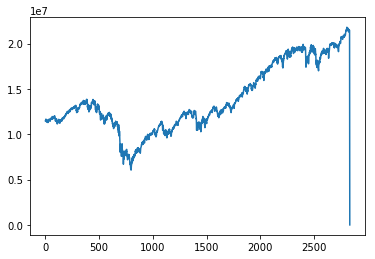

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(market_cap_of_spx)

In [144]:
spy_a = pd.read_csv('../SPY_adjusted.csv', parse_dates=['Date'], index_col='Date')
spy_na = pd.read_csv('../SPY_nonadjusted.csv', parse_dates=['Date'], index_col='Date')

In [150]:
(spy_a.diff()[1:] / np.array(spy_na[:-1])).to_csv('../spy_adjusted_percent_returns')